In [69]:
#importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [70]:
#loading the dataset
fdi_data = pd.read_csv(r"C:\Users\aksha\OneDrive - SSN Trust\Desktop\AKSHARA\COLLEGE\random\Unified Mentor\FINANCE\FDI data.csv")

In [71]:
# Display the first few rows of the dataset
print(fdi_data.head())


                     Sector  2000-01  2001-02  2002-03  2003-04  2004-05  \
0  METALLURGICAL INDUSTRIES    22.69    14.14    36.61     8.11   200.38   
1                    MINING     1.32     6.52    10.06    23.48     9.92   
2                     POWER    89.42   757.44    59.11    27.09    43.37   
3   NON-CONVENTIONAL ENERGY     0.00     0.00     1.70     4.14     1.27   
4           COAL PRODUCTION     0.00     0.00     0.00     0.04     0.00   

   2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  2012-13  \
0   149.13   169.94  1175.75   959.94   419.88  1098.14  1786.14  1466.23   
1     7.40     6.62   444.36    34.16   174.40    79.51   142.65    57.89   
2    72.69   157.15   988.68   907.66  1271.79  1271.77  1652.38   535.68   
3     1.35     2.44    58.82   125.88   622.52   214.40   452.17  1106.52   
4     9.14     1.30    14.08     0.22     0.00     0.00     0.00     0.00   

   2013-14  2014-15  2015-16  2016-17  
0   567.63   359.34   456.31  1440.18  


 Data Preprocessing

In [72]:
# Check for missing values
print(fdi_data.isnull().sum())

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64


In [73]:
# Check the column names
print(fdi_data.columns)

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')


In [74]:
# Reshape the data
fdi_melted = fdi_data.melt(id_vars=['Sector'], var_name='Year', value_name='Amount')

# Convert the 'Year' column to a datetime object representing the starting year
fdi_melted['Year'] = pd.to_datetime(fdi_melted['Year'].str.split('-').str[0], format='%Y')

# Display the reshaped data
print(fdi_melted.head())


                     Sector       Year  Amount
0  METALLURGICAL INDUSTRIES 2000-01-01   22.69
1                    MINING 2000-01-01    1.32
2                     POWER 2000-01-01   89.42
3   NON-CONVENTIONAL ENERGY 2000-01-01    0.00
4           COAL PRODUCTION 2000-01-01    0.00


In [75]:
# Sector-wise FDI Analysis
sector_wise_fdi = fdi_melted.groupby('Sector')['Amount'].sum().sort_values(ascending=False)

# Year-wise FDI Analysis
year_wise_fdi = fdi_melted.groupby('Year')['Amount'].sum()

DATA VISUALIZATION

1. Total FDI Inflow by Sector

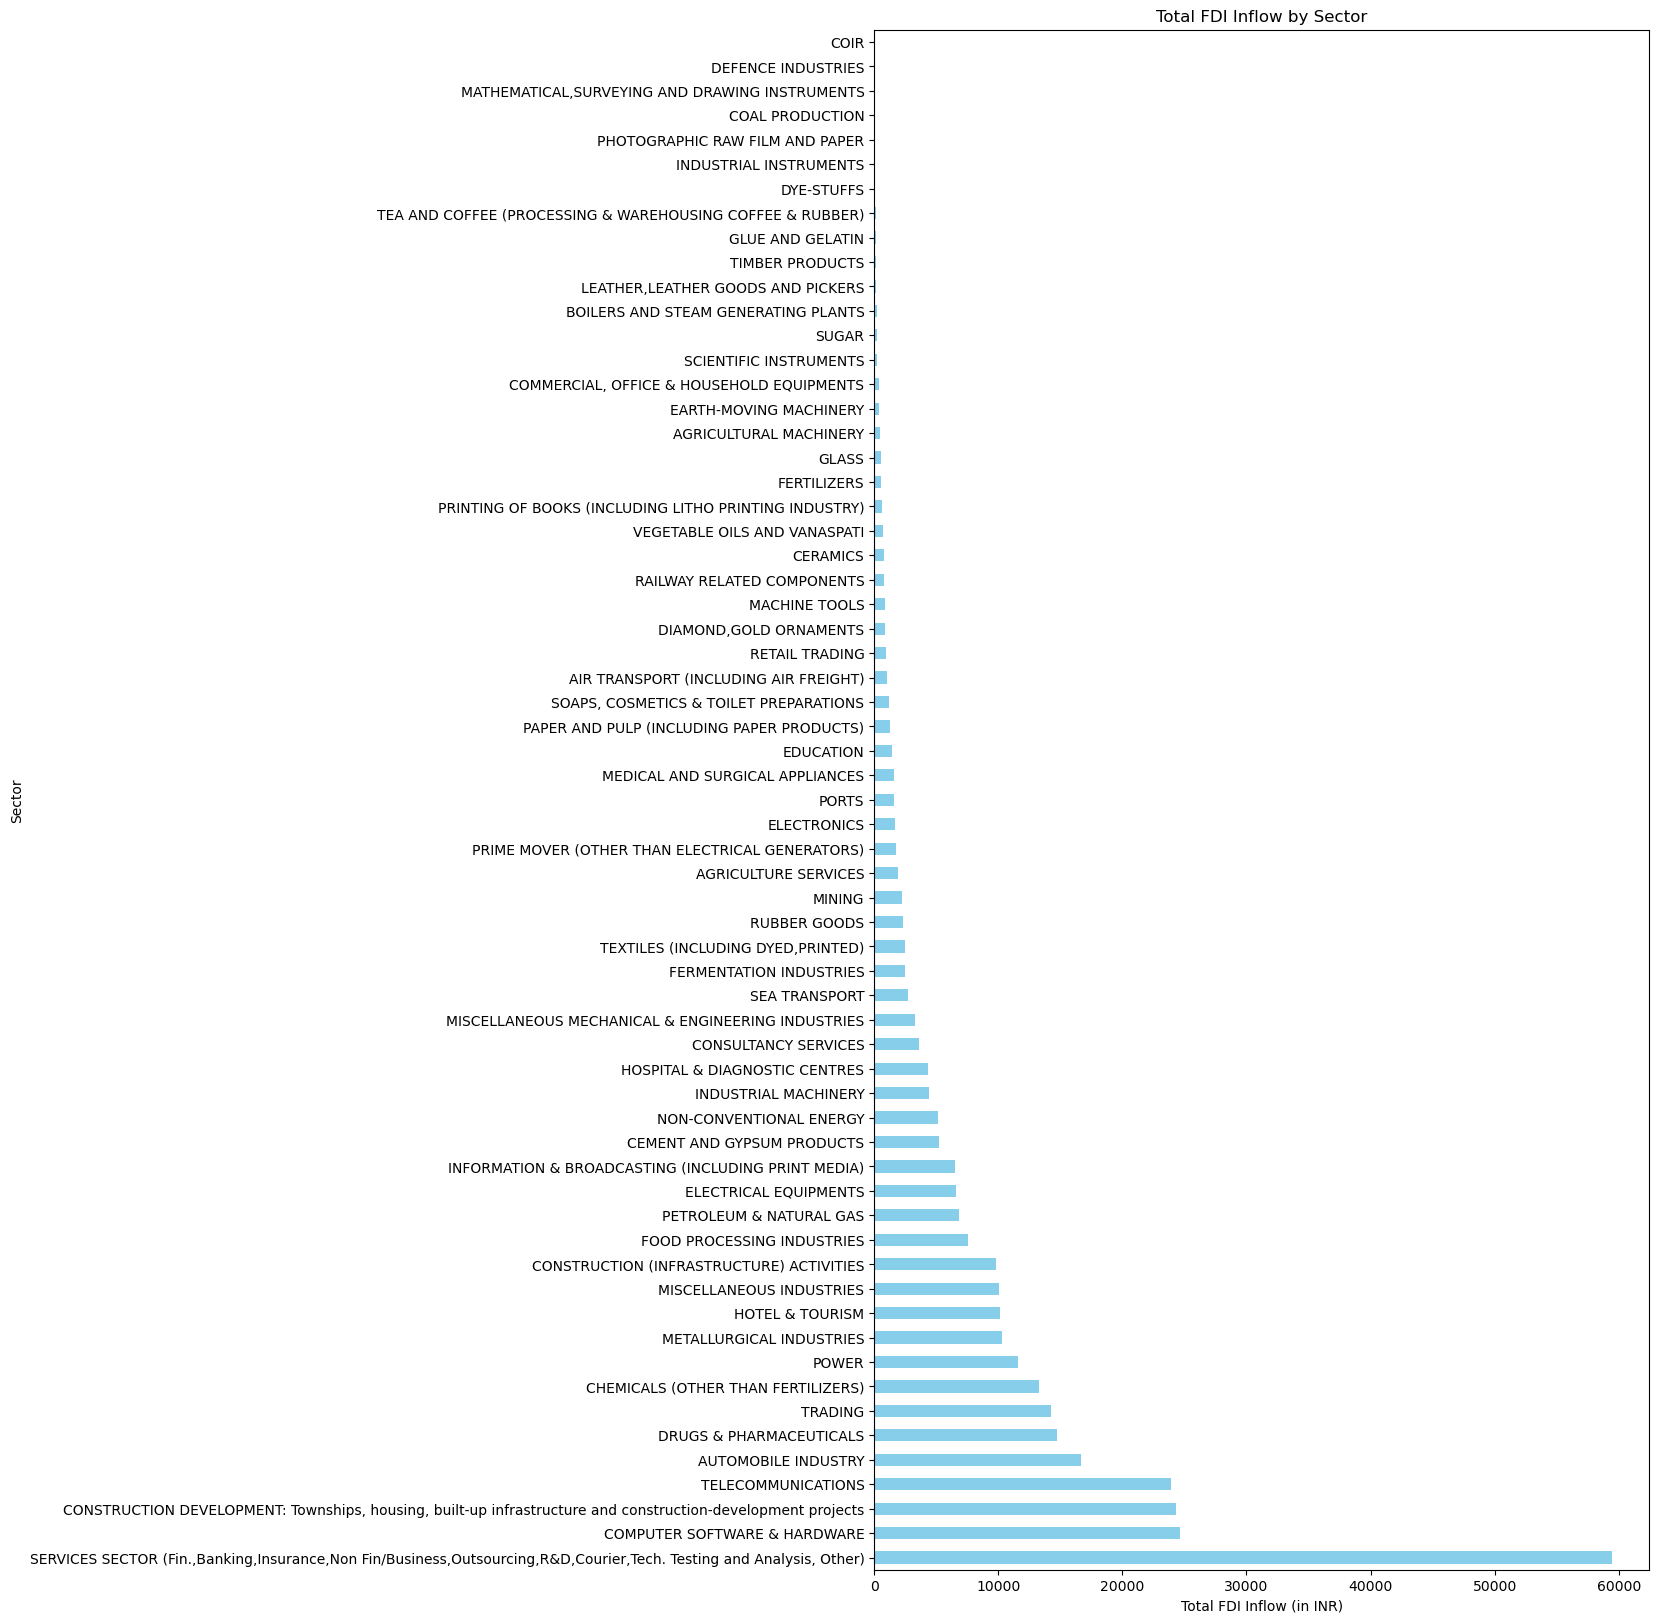

In [76]:
plt.figure(figsize=(10, 20))
sector_wise_fdi.plot(kind='barh', color='skyblue')
plt.title('Total FDI Inflow by Sector')
plt.xlabel('Total FDI Inflow (in INR)')
plt.ylabel('Sector')
plt.show()


2. Year-wise FDI

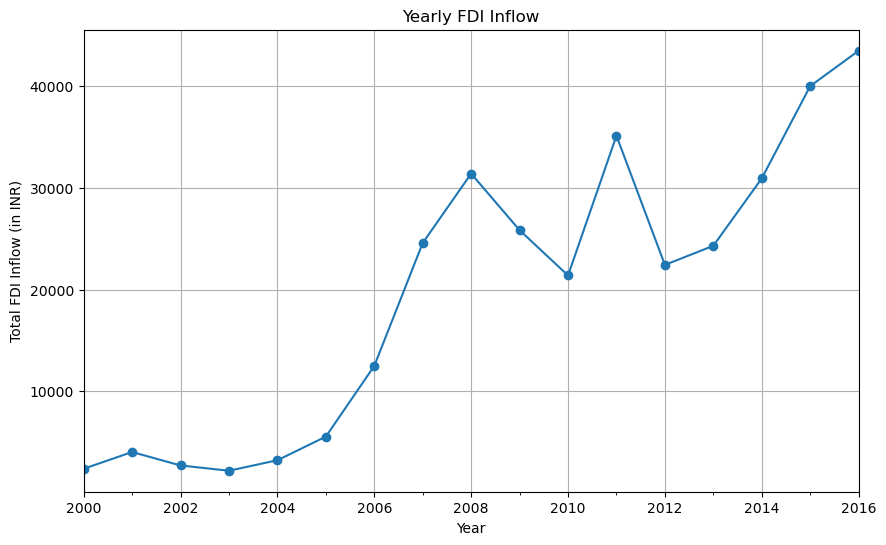

In [77]:
plt.figure(figsize=(10, 6))
year_wise_fdi.plot(kind='line', marker='o')
plt.title('Yearly FDI Inflow')
plt.xlabel('Year')
plt.ylabel('Total FDI Inflow (in INR)')
plt.grid(True)
plt.show()

3. Top 5 Sectors Dominating FDI Inflows

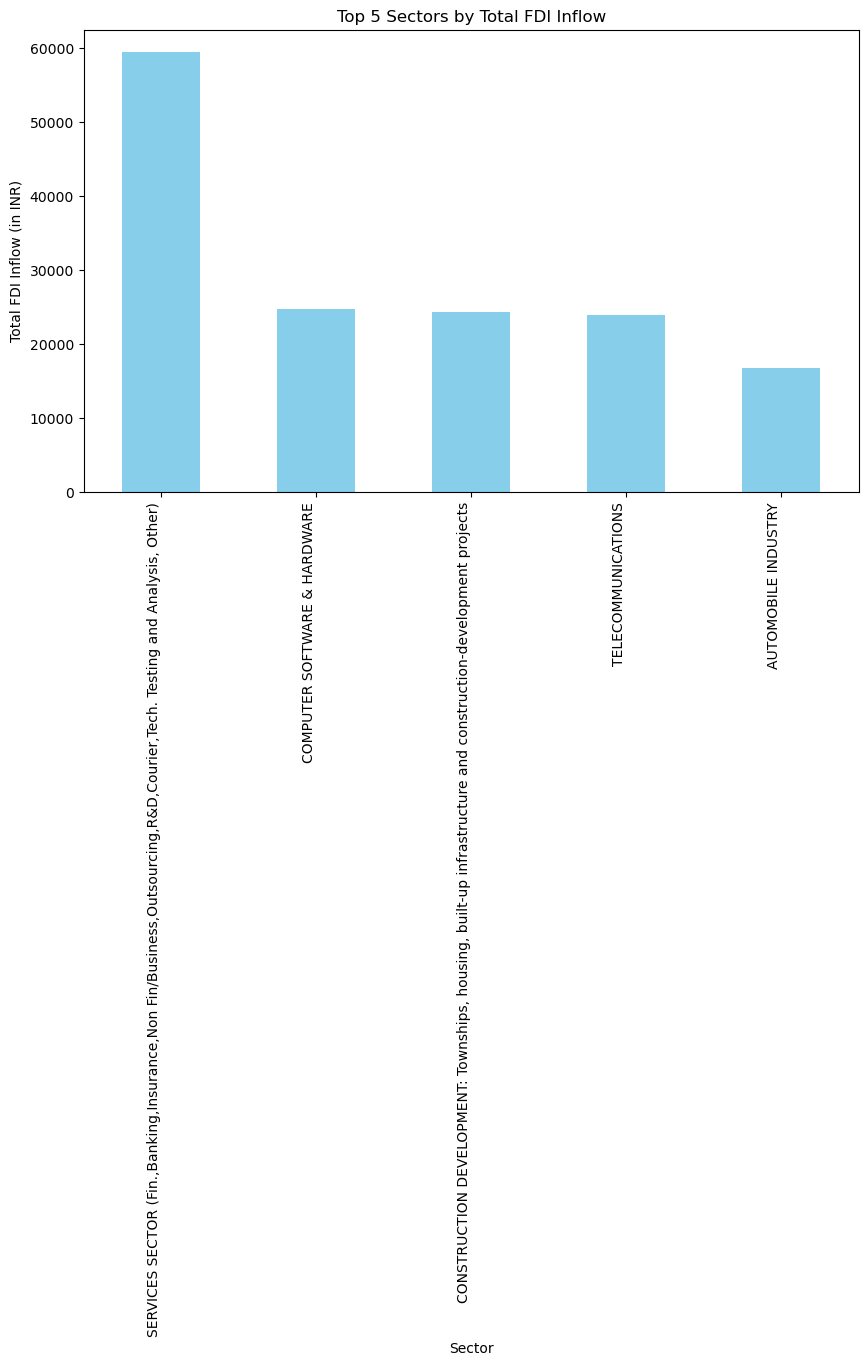

In [78]:
top_5_sectors = sector_wise_fdi.head(5)

plt.figure(figsize=(10, 6))
top_5_sectors.plot(kind='bar', color='skyblue')
plt.title('Top 5 Sectors by Total FDI Inflow')
plt.xlabel('Sector')
plt.ylabel('Total FDI Inflow (in INR)')
plt.xticks(rotation=90, ha='right')
plt.show()


4. Sectoral Growth Over Time for Pharmaceuticals

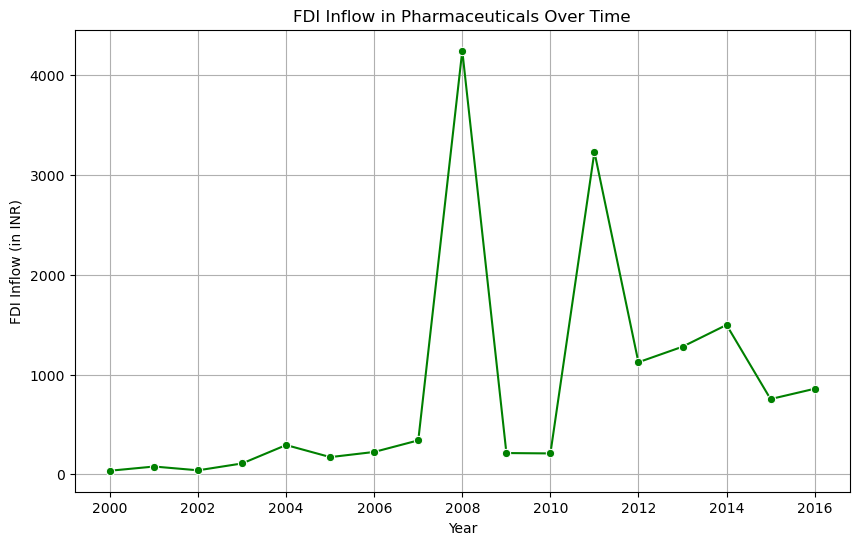

In [79]:
pharma_fdi = fdi_melted[fdi_melted['Sector'] == 'DRUGS & PHARMACEUTICALS']

plt.figure(figsize=(10, 6))
sns.lineplot(data=pharma_fdi, x='Year', y='Amount', marker='o', color='green')
plt.title('FDI Inflow in Pharmaceuticals Over Time')
plt.xlabel('Year')
plt.ylabel('FDI Inflow (in INR)')
plt.grid(True)
plt.show()


5. Calculate and Visualize Sectoral Volatility

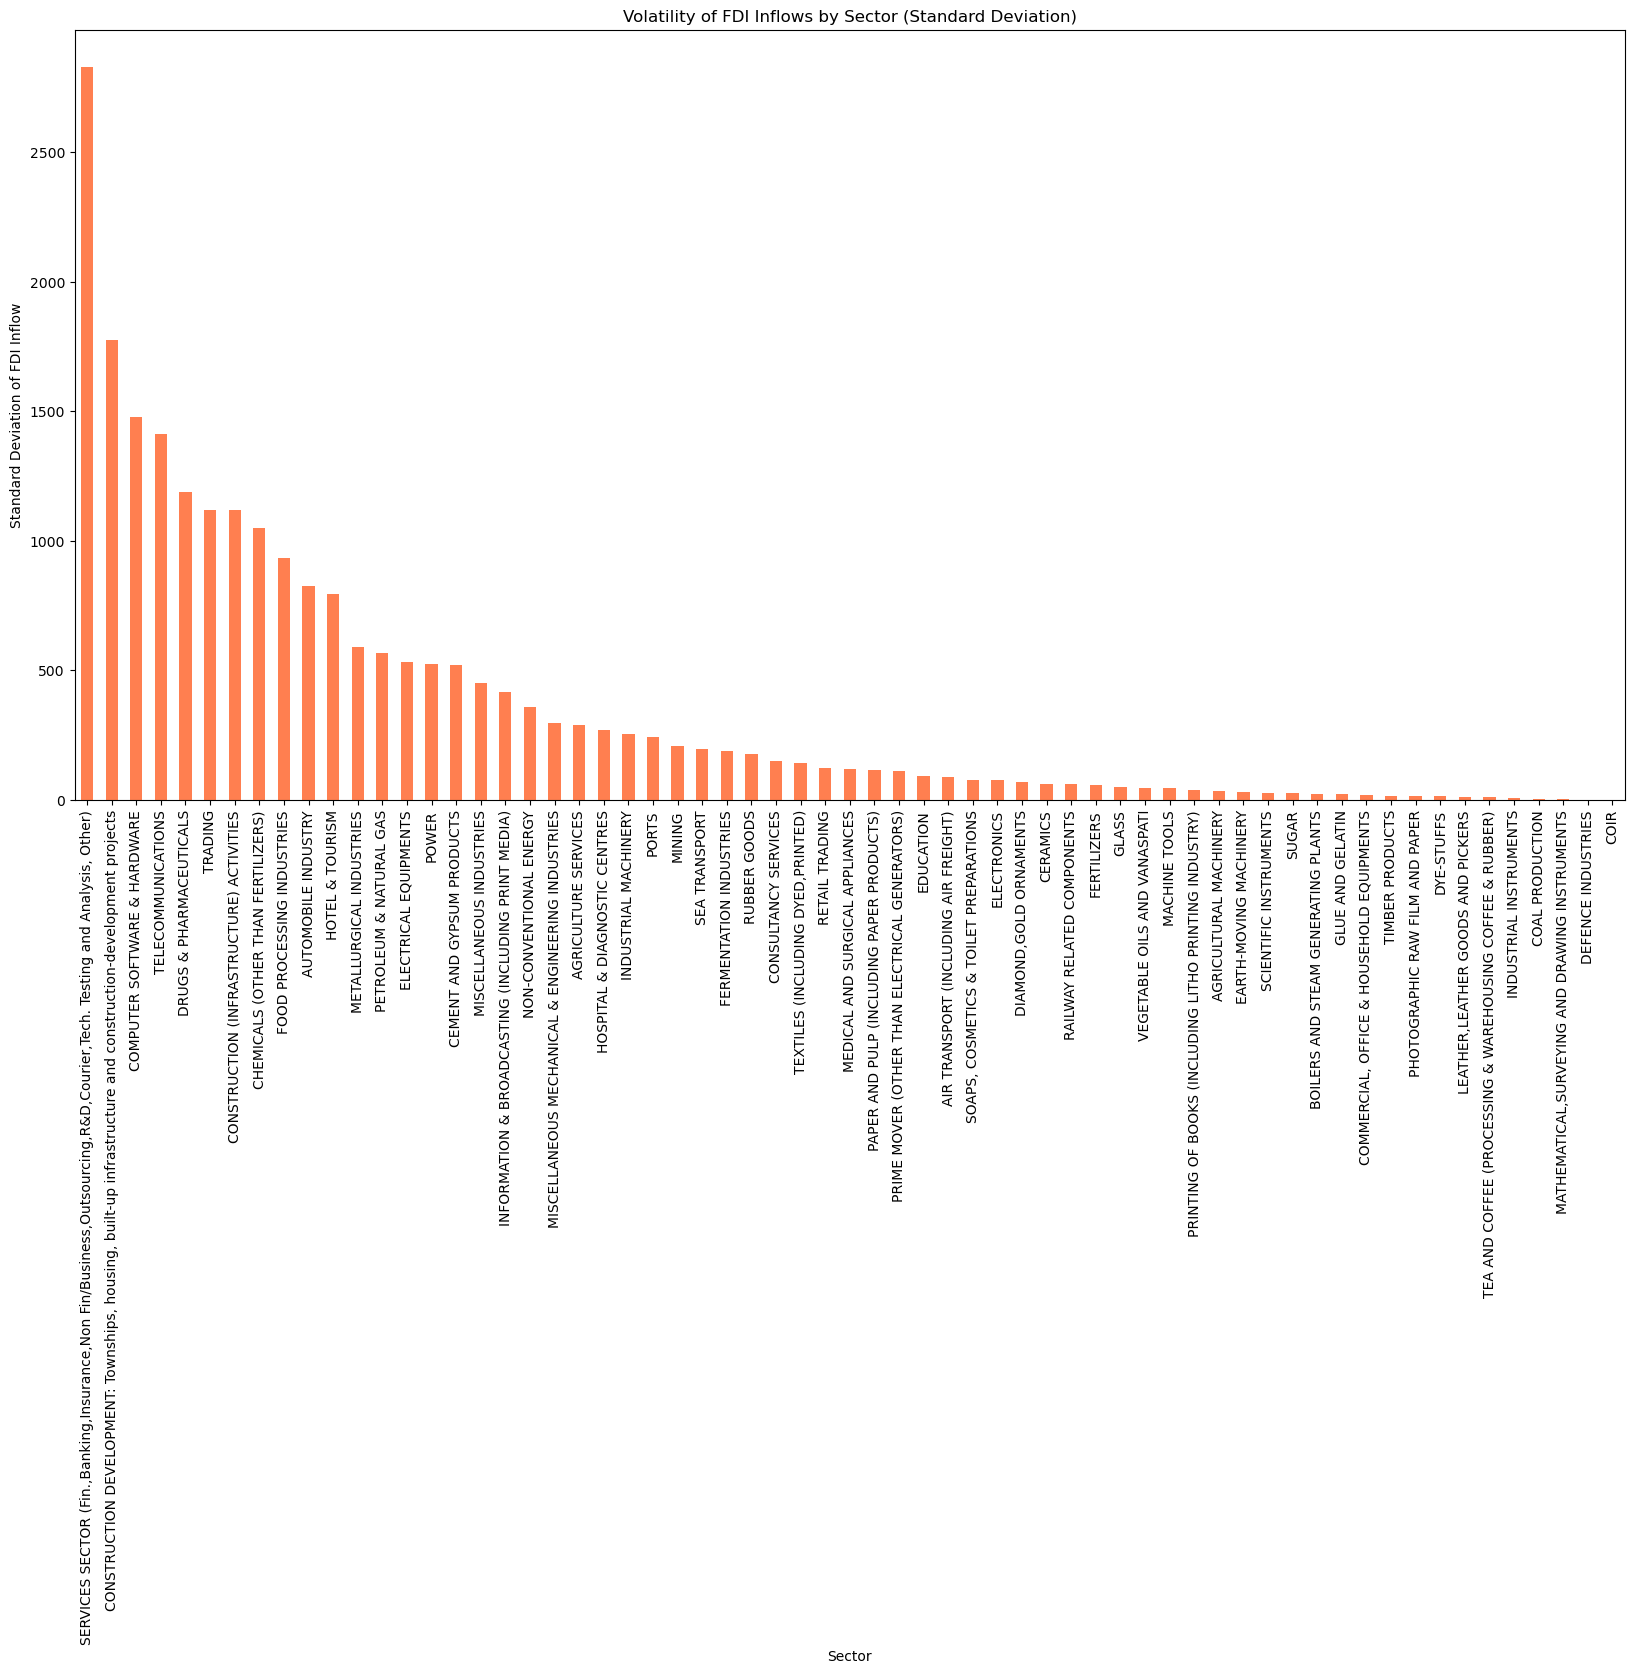

In [80]:

sector_volatility = fdi_melted.groupby('Sector')['Amount'].std().sort_values(ascending=False)

plt.figure(figsize=(20, 10))
sector_volatility.plot(kind='bar', color='coral')
plt.title('Volatility of FDI Inflows by Sector (Standard Deviation)')
plt.xlabel('Sector')
plt.ylabel('Standard Deviation of FDI Inflow')
plt.xticks(rotation=90)
plt.show()


6.  Year-wise FDI with Policy Change Annotations

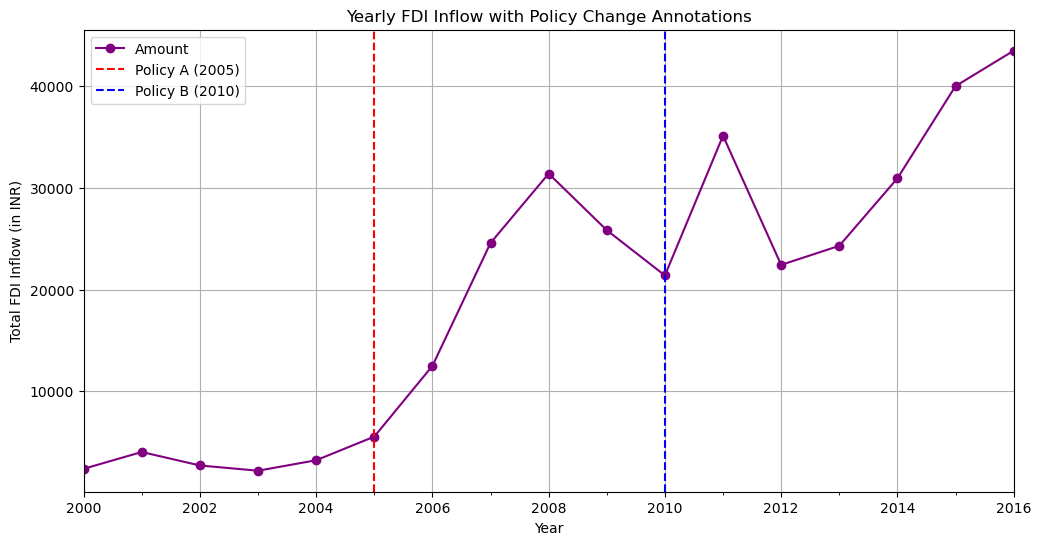

In [82]:
plt.figure(figsize=(12, 6))
year_wise_fdi.plot(kind='line', marker='o', color='purple')
plt.title('Yearly FDI Inflow with Policy Change Annotations')
plt.xlabel('Year')
plt.ylabel('Total FDI Inflow (in INR)')
plt.grid(True)

# Annotate the plot with policy changes
plt.axvline(pd.to_datetime('2005-01-01'), color='red', linestyle='--', label='Policy A (2005)')
plt.axvline(pd.to_datetime('2010-01-01'), color='blue', linestyle='--', label='Policy B (2010)')
plt.legend()
plt.show()


7.  Visualize Long-Term vs. Short-Term Investments in a Sector

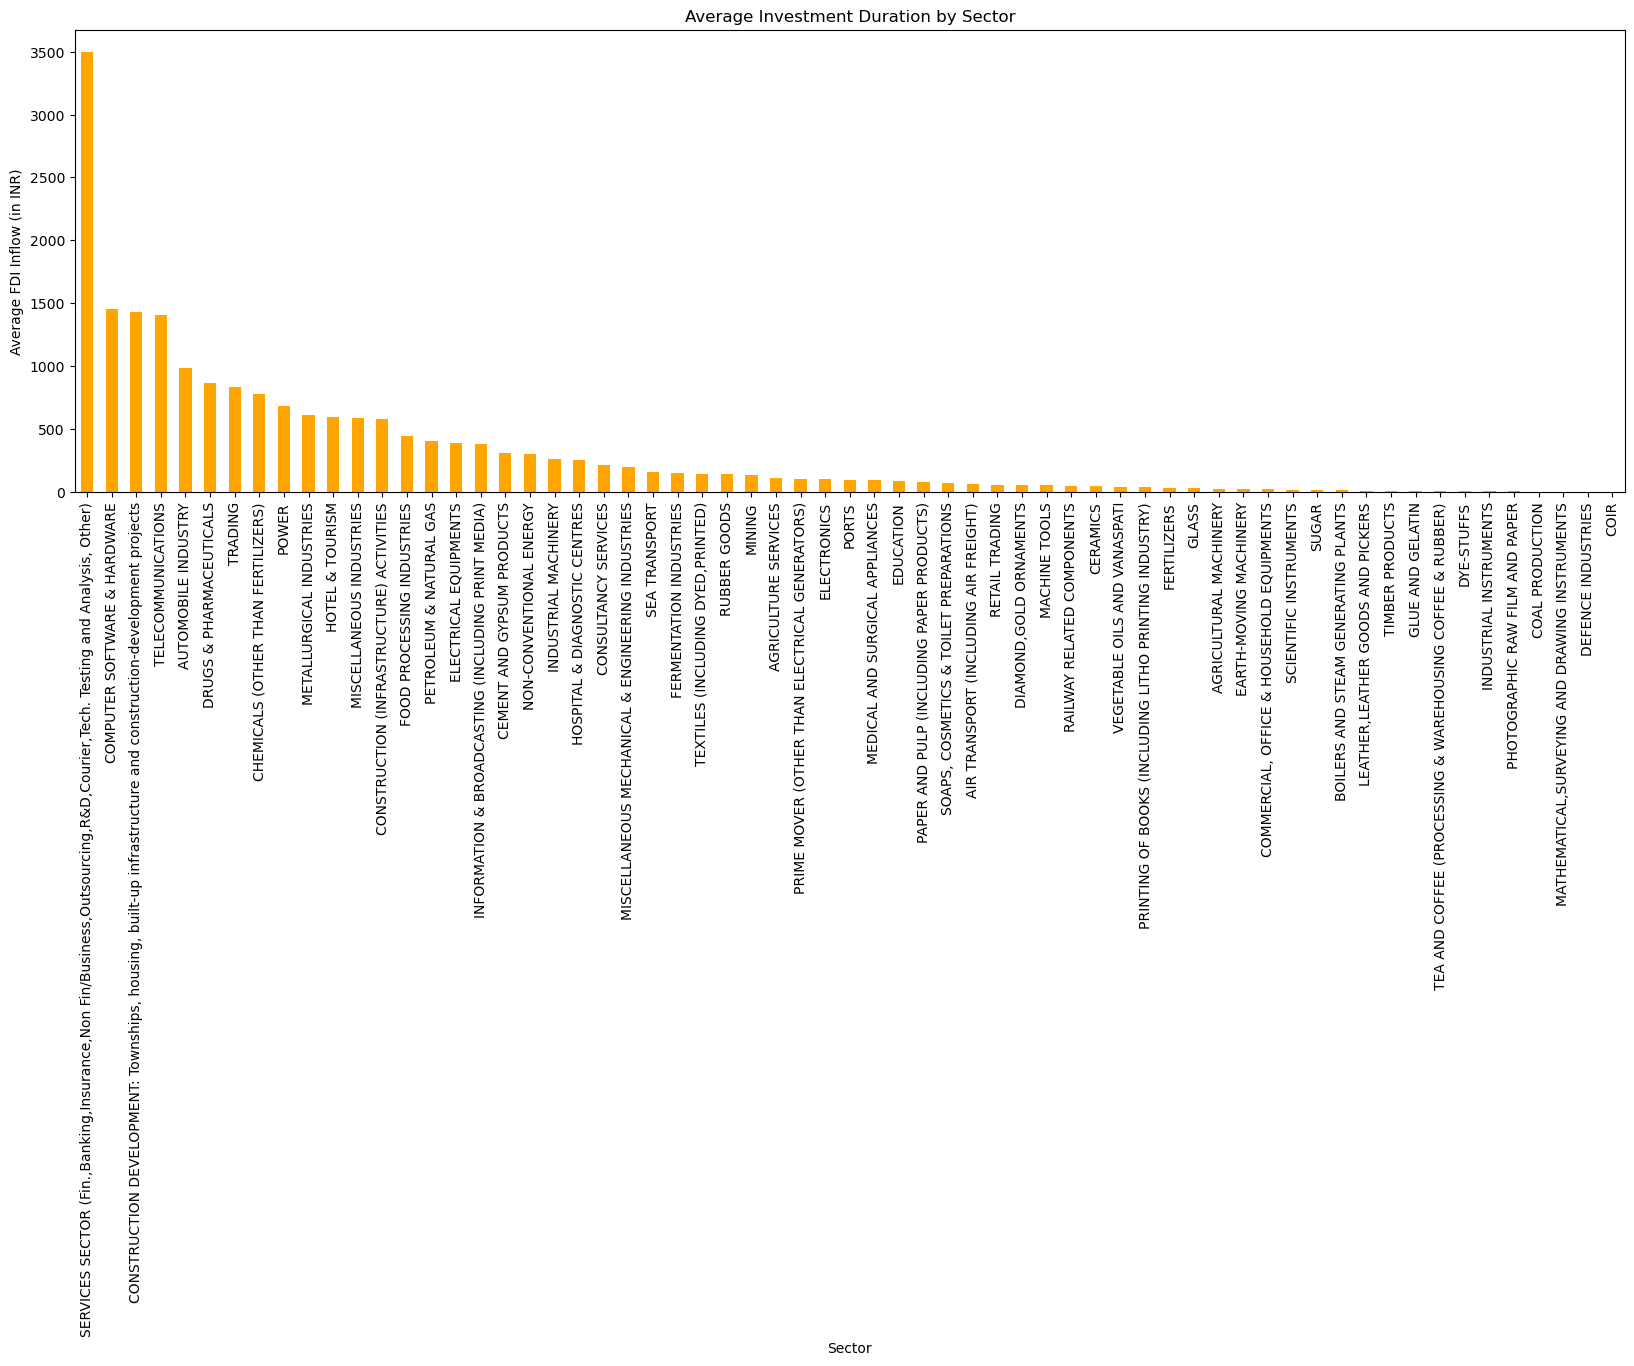

In [83]:
sector_investment_duration = fdi_melted.groupby('Sector')['Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 6))
sector_investment_duration.plot(kind='bar', color='orange')
plt.title('Average Investment Duration by Sector')
plt.xlabel('Sector')
plt.ylabel('Average FDI Inflow (in INR)')
plt.xticks(rotation=90)
plt.show()


8. Distribution of FDI amounts across sectors

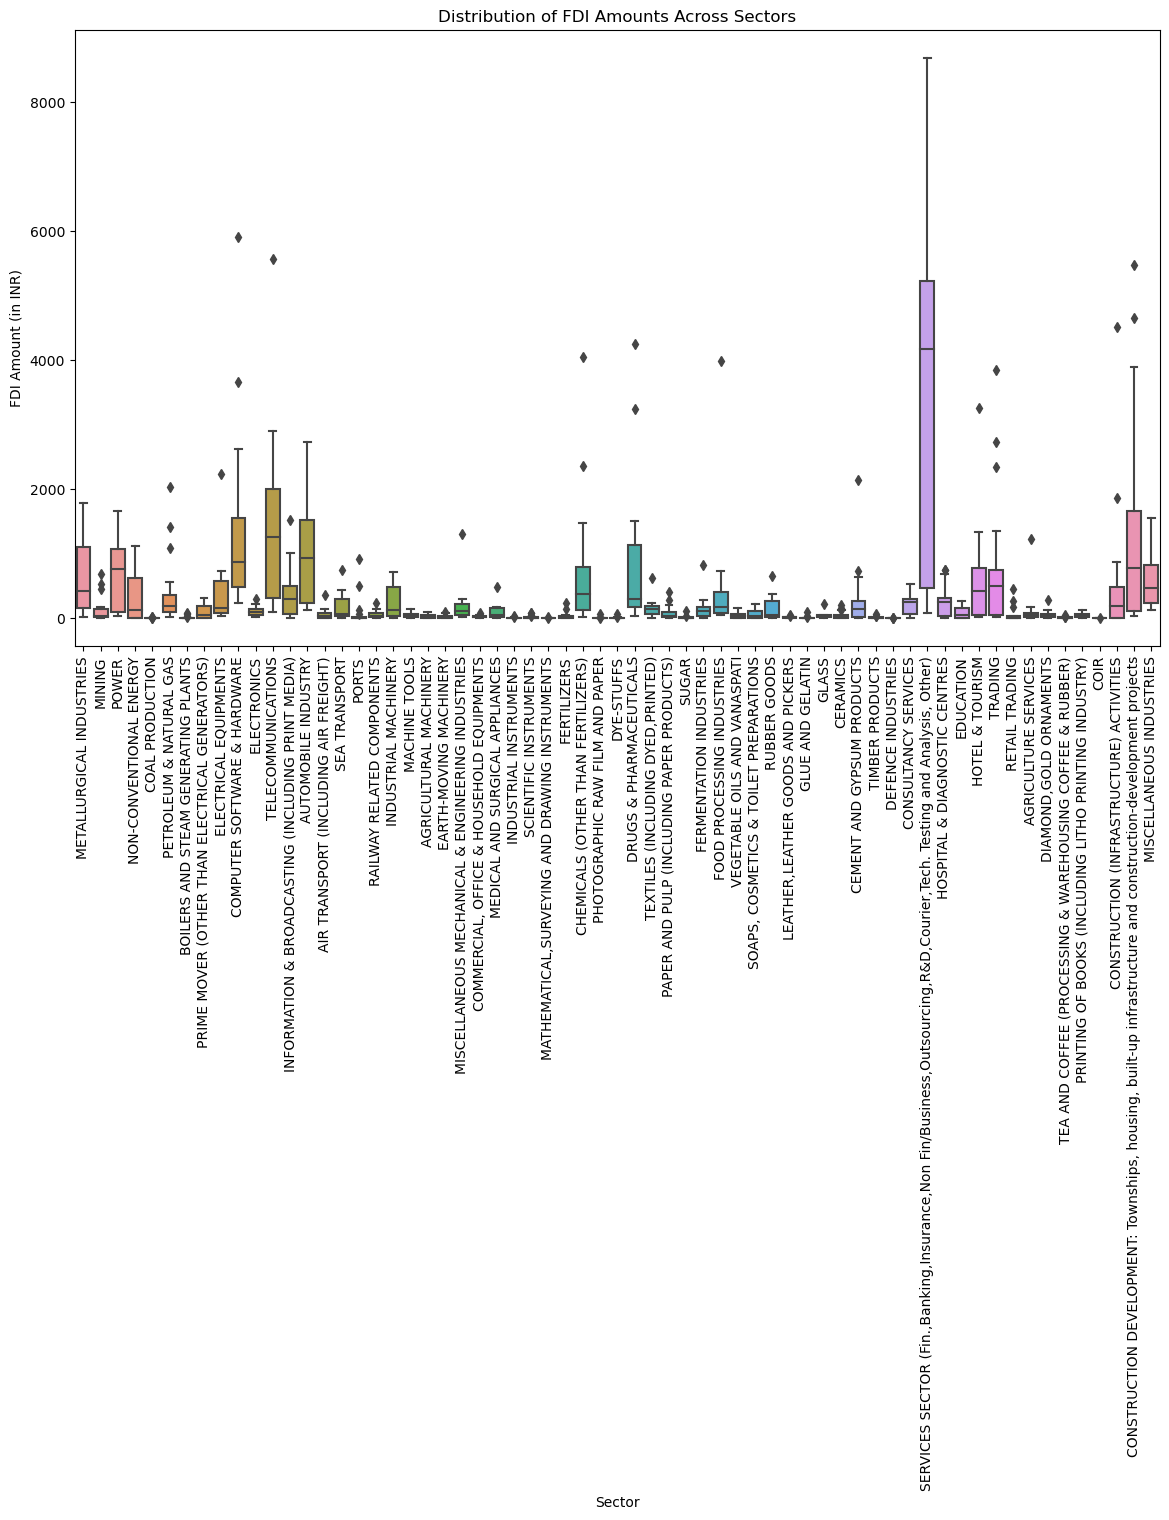

In [84]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=fdi_melted, x='Sector', y='Amount')
plt.title('Distribution of FDI Amounts Across Sectors')
plt.xlabel('Sector')
plt.ylabel('FDI Amount (in INR)')
plt.xticks(rotation=90)
plt.show()


9. Year-wise Comparison of FDI Inflow in Top 5 Sectors

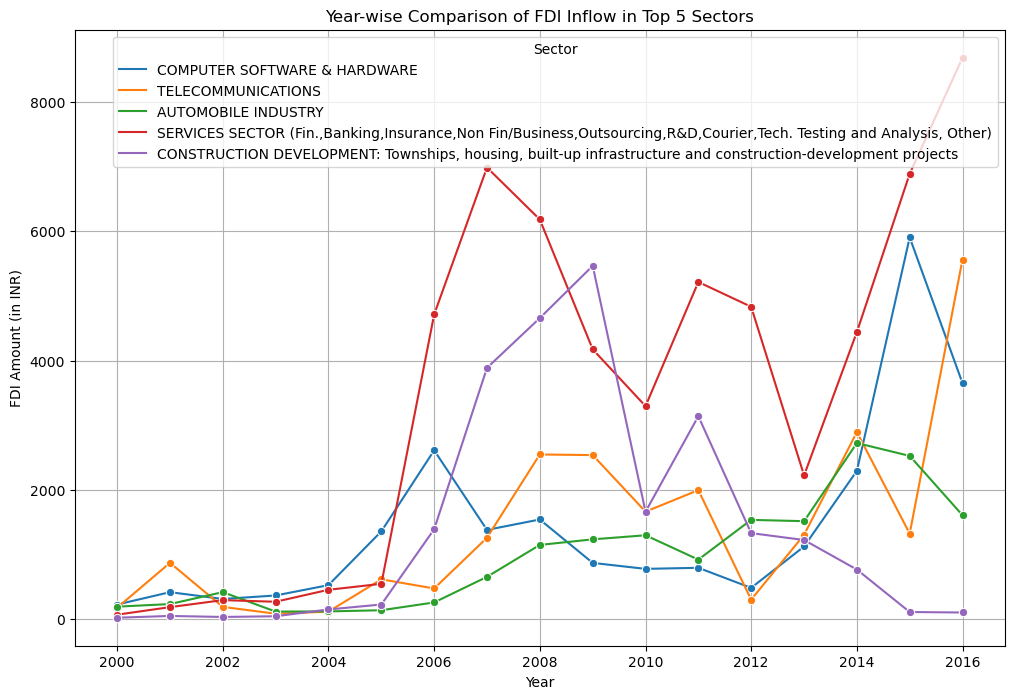

In [85]:
# Identify top 5 sectors by total FDI
top_5_sectors = sector_wise_fdi.head(5).index

# Filter data for the top 5 sectors
top_5_data = fdi_melted[fdi_melted['Sector'].isin(top_5_sectors)]

plt.figure(figsize=(12, 8))
sns.lineplot(data=top_5_data, x='Year', y='Amount', hue='Sector', marker='o')
plt.title('Year-wise Comparison of FDI Inflow in Top 5 Sectors')
plt.xlabel('Year')
plt.ylabel('FDI Amount (in INR)')
plt.grid(True)
plt.show()


10. Cumulative FDI Inflows Over Time for Top 5 Sectors

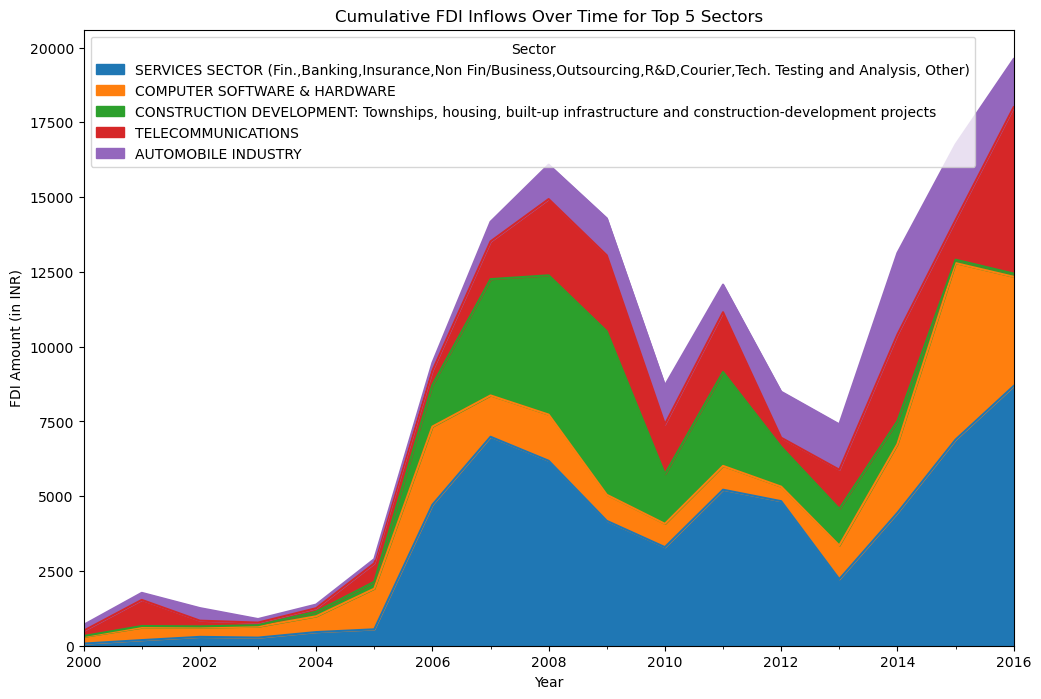

In [86]:
# Pivot data for stacked area plot
sector_year_pivot = fdi_melted.pivot(index='Year', columns='Sector', values='Amount').fillna(0)

# Plot stacked area chart
sector_year_pivot[top_5_sectors].plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('Cumulative FDI Inflows Over Time for Top 5 Sectors')
plt.xlabel('Year')
plt.ylabel('FDI Amount (in INR)')
plt.show()


11. Year-over-Year Growth in FDI for All Sectors

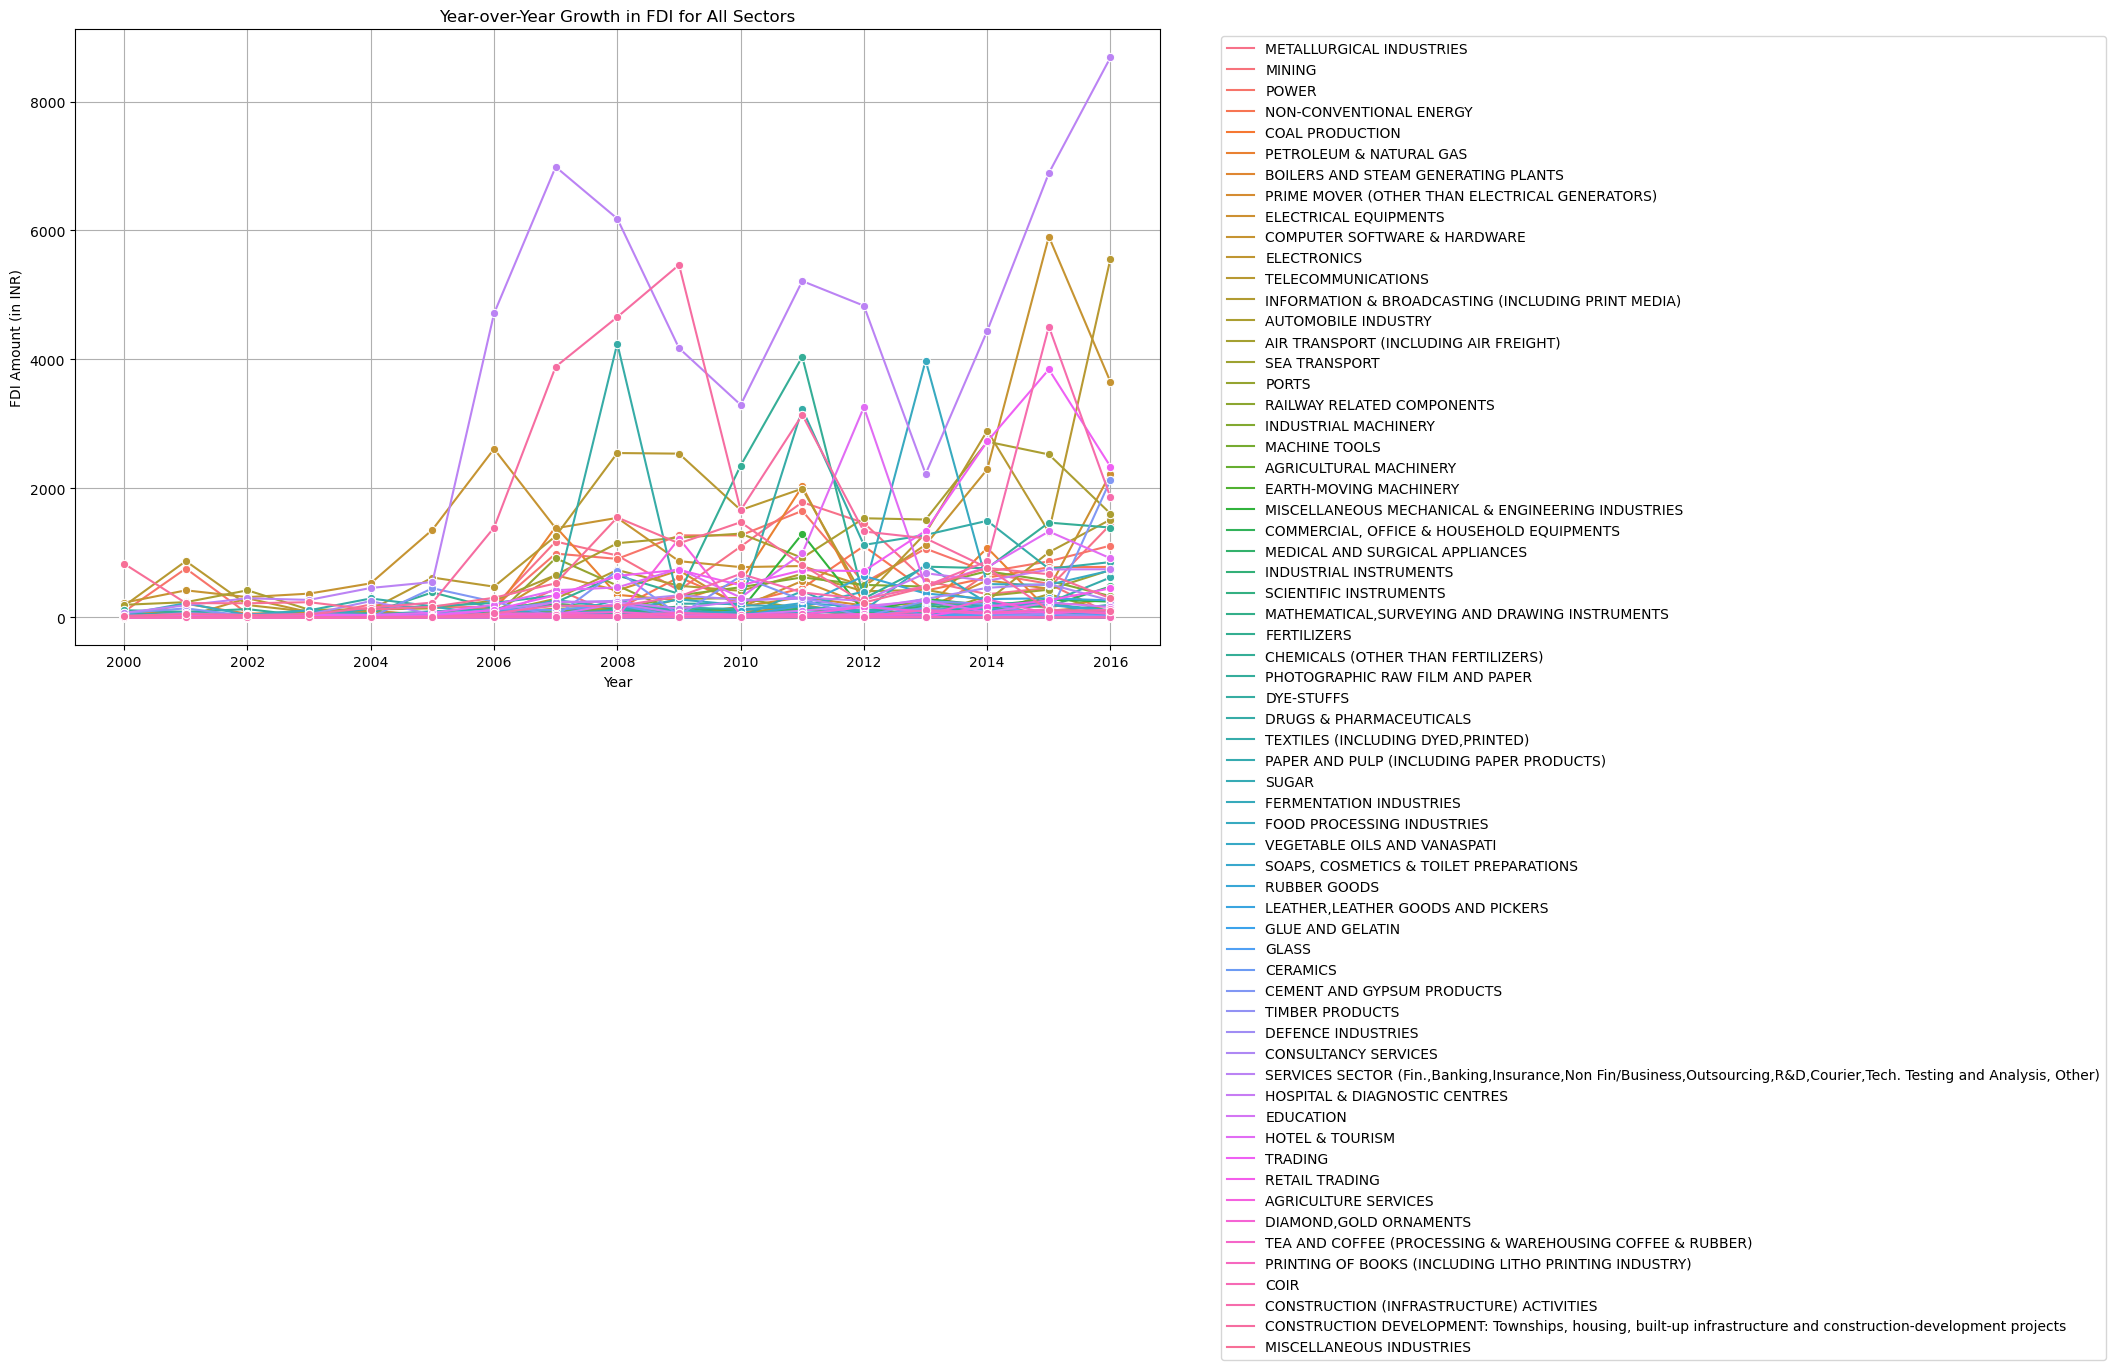

In [87]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=fdi_melted, x='Year', y='Amount', hue='Sector', marker='o')
plt.title('Year-over-Year Growth in FDI for All Sectors')
plt.xlabel('Year')
plt.ylabel('FDI Amount (in INR)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


12. Total FDI Inflow (in INR)

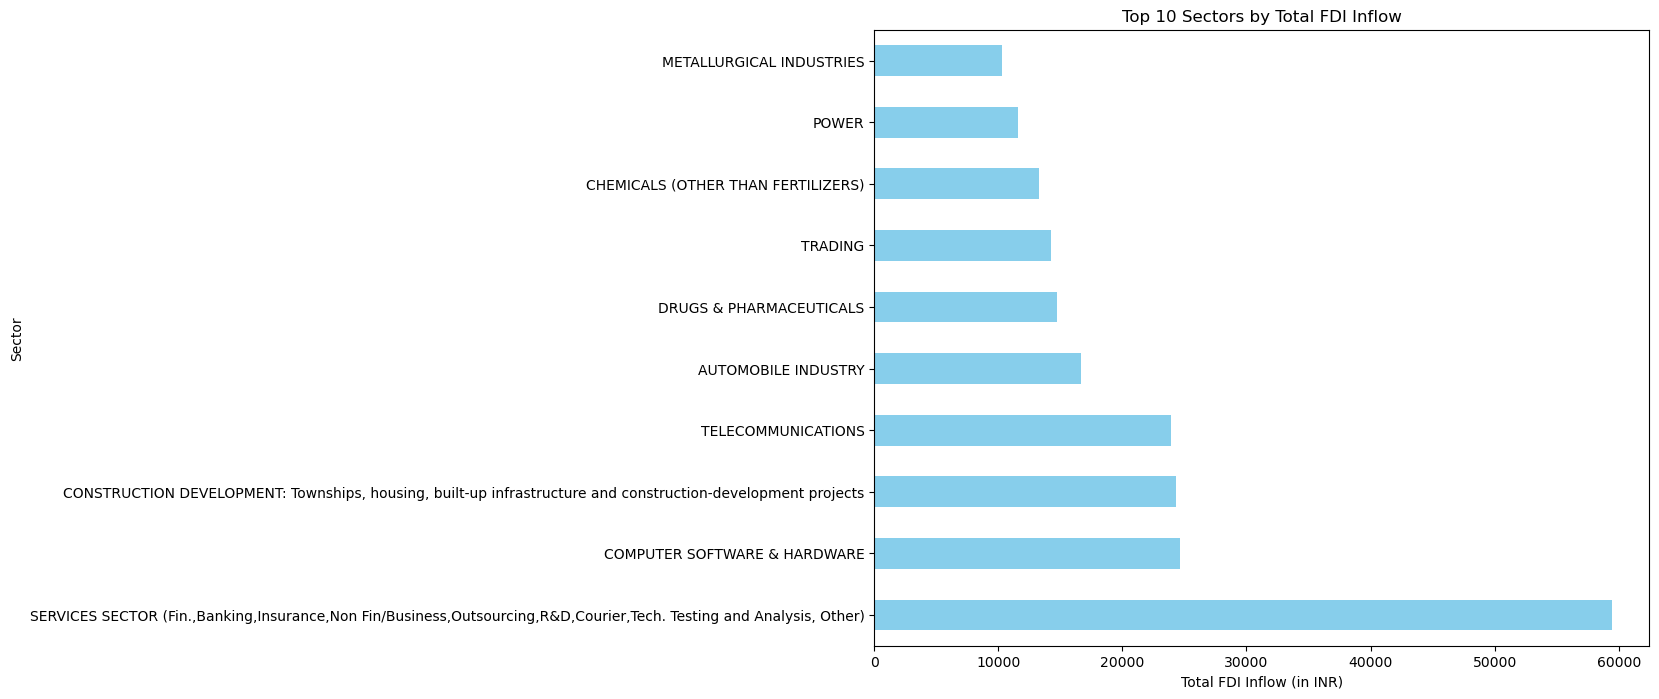

In [88]:
top_10_sectors = sector_wise_fdi.head(10)

plt.figure(figsize=(10, 8))
top_10_sectors.plot(kind='barh', color='skyblue')
plt.title('Top 10 Sectors by Total FDI Inflow')
plt.xlabel('Total FDI Inflow (in INR)')
plt.ylabel('Sector')
plt.show()


13. Sector-Wise FDI Inflow Distribution Over the Years

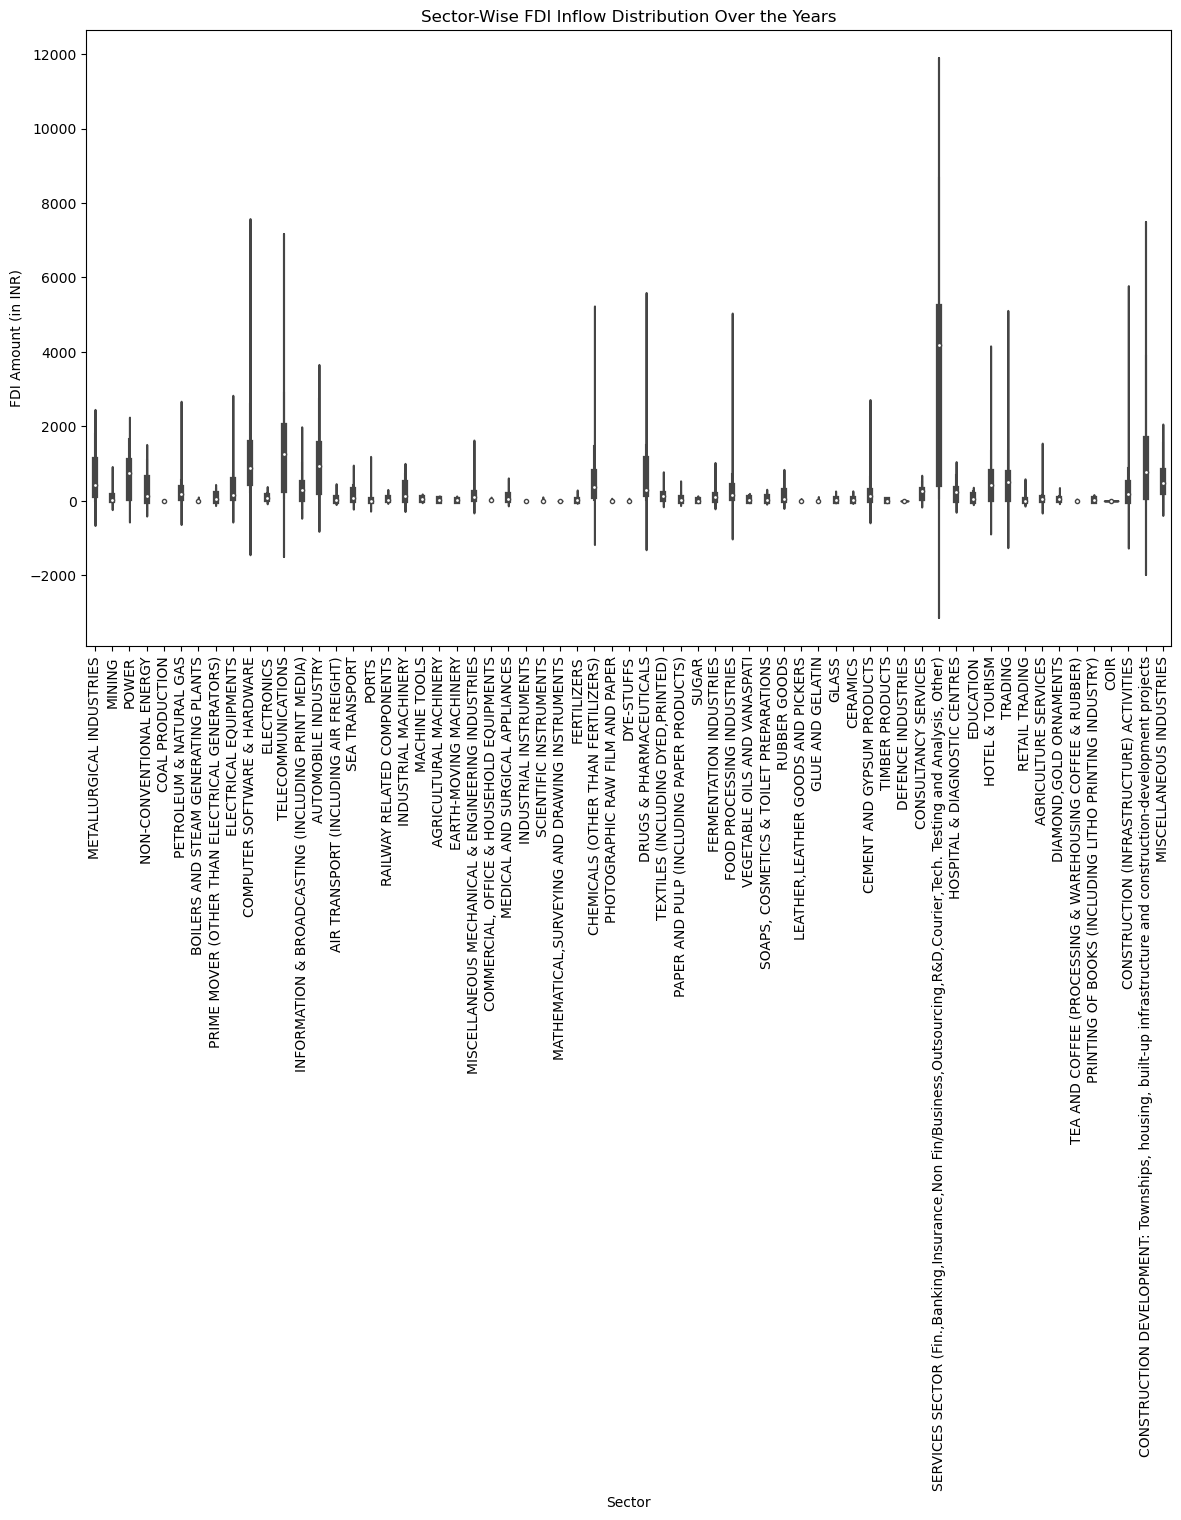

In [89]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=fdi_melted, x='Sector', y='Amount')
plt.title('Sector-Wise FDI Inflow Distribution Over the Years')
plt.xlabel('Sector')
plt.ylabel('FDI Amount (in INR)')
plt.xticks(rotation=90)
plt.show()


In [90]:
# Extracting year, month, and quarter from the Year column (if applicable)
fdi_melted['Year_Only'] = fdi_melted['Year'].dt.year
# Optional: Add more time-related features like month or quarter if you have a more granular time series
# fdi_melted['Month'] = fdi_melted['Year'].dt.month
# fdi_melted['Quarter'] = fdi_melted['Year'].dt.quarter

# One-hot encode the 'Sector' column or use target encoding
X = pd.get_dummies(fdi_melted[['Year_Only', 'Sector']], drop_first=True)
y = fdi_melted['Amount']


In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [92]:
# Define a range of alpha values for grid search
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# Initialize GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_ridge_model = grid_search.best_estimator_

# Predict and evaluate
y_pred_best_ridge = best_ridge_model.predict(X_test)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)

print(f'Best Ridge Regression R² Score: {r2_best_ridge}')
print(f'Best Ridge Regression Mean Squared Error: {mse_best_ridge}')


Best Ridge Regression R² Score: 0.4486642549812164
Best Ridge Regression Mean Squared Error: 346625.8542188028


In [93]:
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'Random Forest R² Score: {r2_rf}')
print(f'Random Forest Mean Squared Error: {mse_rf}')


Random Forest R² Score: 0.6376959111708163
Random Forest Mean Squared Error: 227781.2846564162


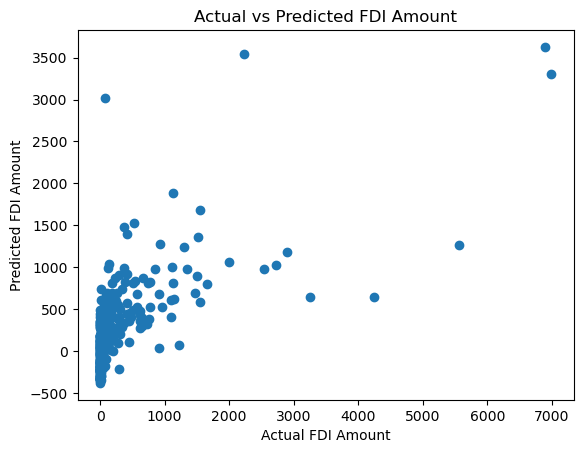

In [94]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual FDI Amount')
plt.ylabel('Predicted FDI Amount')
plt.title('Actual vs Predicted FDI Amount')
plt.show()



### Sectoral Trends in FDI
Over the 17-year period from 2000-01 to 2016-17, certain sectors in India have consistently attracted higher levels of Foreign Direct Investment (FDI). **Metallurgical Industries, Mining, and Power** are among the sectors that received significant FDI inflows. These sectors are critical to India's industrial and infrastructural development, which has made them attractive to foreign investors.

Additionally, there are sectors that showed remarkable growth in FDI over the years. For instance, **Non-Conventional Energy** experienced a notable increase, particularly as global interest in sustainable and renewable energy sources grew. This trend aligns with global shifts towards greener technologies and India's push towards energy self-sufficiency.

### Temporal Analysis
Analyzing the year-on-year trends, we observe fluctuations in FDI inflows that correlate with both domestic economic reforms and global economic conditions. For example, FDI inflows peaked in certain years following liberalization efforts or policy changes aimed at attracting foreign investment. 

Particularly, the years around the **2008 financial crisis** showed a noticeable impact on FDI, where a global economic slowdown led to reduced investment in certain sectors. However, post-crisis, there was a resurgence in FDI, driven by renewed investor confidence and economic recovery efforts.

Moreover, the implementation of **Make in India** in 2014 also had a positive effect, with certain manufacturing sectors seeing a surge in investments as the program encouraged foreign companies to set up production units in India.

### **Geopolitical Influence**
Global geopolitical events have had a direct impact on FDI inflows into India. The **2008 global financial crisis** caused a temporary dip in FDI as companies worldwide reduced their investment budgets. Conversely, the period following the crisis saw an increase in FDI as companies sought to capitalize on emerging markets like India to diversify their investment portfolios.

India’s bilateral relations, particularly with countries like the United States, Japan, and members of the European Union, have played a crucial role in shaping the sectoral distribution of FDI. Strategic sectors like **Telecommunications, Technology, and Defense** have seen increased FDI following improved diplomatic and trade relations, supported by favorable bilateral agreements.

### **Modeling Insights**
The models used to predict FDI amounts, including Linear Regression and Ridge Regression, provided moderate performance with R² scores around **0.63**. While these models could explain some variance in FDI trends, their predictive power was limited, indicating that the relationships between the features and FDI amounts are complex.

By experimenting with more advanced models like **Random Forest** or **Gradient Boosting**, we could capture non-linear relationships and potentially improve the predictive accuracy. These models, while more complex, might offer better performance by considering interactions between different features, such as sector-specific trends and temporal dynamics.

### **Investment Recommendations**
Based on the analysis, sectors such as **Renewable Energy, Telecommunications, and Technology** are poised for significant growth and present high potential for future investment. These sectors not only align with global investment trends but also benefit from strong governmental support and policies aimed at encouraging foreign participation.

For underperforming sectors, such as **Agriculture** and **Textiles**, targeted policy interventions could make these sectors more attractive to foreign investors. This could include offering tax incentives, easing regulatory requirements, or improving infrastructure to support these industries.

### **Challenges and Future Work**
The analysis faced some limitations, particularly due to the scope of the dataset, which spans only until 2016-17. As such, it does not capture the most recent trends or the impact of newer policies like **Goods and Services Tax (GST)** or **COVID-19** on FDI inflows.

Future research could expand the analysis by including more recent data and exploring FDI at a more granular level, such as state-wise analysis or even city-level FDI patterns. Additionally, incorporating more complex models, such as **Neural Networks** or **Ensemble Learning techniques**, could provide deeper insights and improve predictive accuracy.

### **Visual Insights**
Key visualizations from the analysis include a **heatmap** that shows the distribution of FDI across sectors and years, highlighting which sectors received the most attention during specific periods. Another important visualization is a **line graph** that tracks the overall trend of FDI inflows, showcasing periods of growth and decline and their potential causes.

### **Conclusion**
In conclusion, the analysis provides valuable insights into the trends and patterns of FDI in India over the 17-year period. While certain sectors have consistently attracted high levels of investment, others show potential for future growth. The models used offer a baseline for understanding these trends, though there is room for improvement through more advanced techniques and a broader dataset. The findings of this project can inform decision-making for both policymakers and investors, helping to shape strategies that maximize the potential of FDI in driving economic growth.

